In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import numpy as np

In [2]:
df = pd.read_csv('BPI-MELD-main/BPI-MELD-main/train/train_sent_emo.csv', index_col=0)

df

,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
Sr No.,,,,,,,,,,
1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"
...,...,...,...,...,...,...,...,...,...,...
10474,You or me?,Chandler,neutral,neutral,1038,13,2,3,"00:00:48,173","00:00:50,799"
10475,"I got it. Uh, Joey, women don't have Adam's ap...",Ross,neutral,neutral,1038,14,2,3,"00:00:51,009","00:00:53,594"
10476,"You guys are messing with me, right?",Joey,surprise,positive,1038,15,2,3,"00:01:00,518","00:01:03,520"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9989 entries, 1 to 10478
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Utterance     9989 non-null   object
 1   Speaker       9989 non-null   object
 2   Emotion       9989 non-null   object
 3   Sentiment     9989 non-null   object
 4   Dialogue_ID   9989 non-null   int64 
 5   Utterance_ID  9989 non-null   int64 
 6   Season        9989 non-null   int64 
 7   Episode       9989 non-null   int64 
 8   StartTime     9989 non-null   object
 9   EndTime       9989 non-null   object
dtypes: int64(4), object(6)
memory usage: 858.4+ KB


In [4]:
#convert utt to str
df['Utterance'] = df['Utterance'].astype(str)

In [5]:
#Create a new column named 'image_names' in the DataFrame to store the image file names

df['image_names'] = df.apply(lambda row: f'dia{row["Dialogue_ID"]}_utt{row["Utterance_ID"]}', axis=1)



In [6]:
df.head()

,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,image_names
Sr No.,,,,,,,,,,,
1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731",dia0_utt0
2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442",dia0_utt1
3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389",dia0_utt2
4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572",dia0_utt3
5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917",dia0_utt4


Text(0.5, 1.0, 'Distribution of Description Lengths')

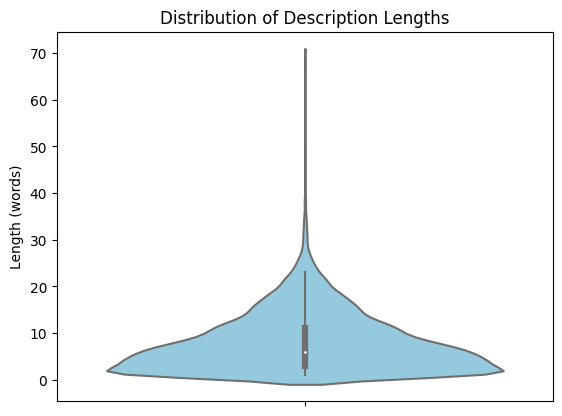

In [7]:
# Calculate the length of each comment
utt_lengths = df['Utterance'].str.split().apply(len)

# Plot the violin plot for comment lengths
fig = sns.violinplot(y=utt_lengths, color="skyblue")
fig.set_ylabel('Length (words)')
fig.set_title('Distribution of Description Lengths')

In [8]:
# Create stopword list:
stopwords_lst = set(STOPWORDS)
stopwords_lst.update(["_x000D_", 'br', 'b'])

def create_word_cloud(text):
  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords_lst, background_color="white").generate(text)

  # Display the generated image
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

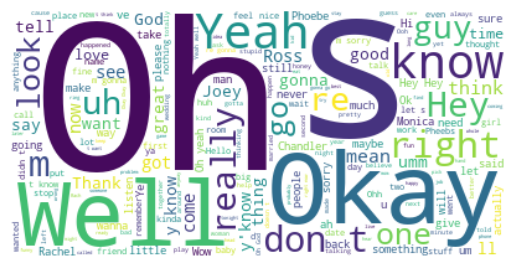

In [9]:
#Creates the concatenated_info that will be used in the word cloud below
concatenated_utt = df['Utterance'].str.cat(sep=' ')

create_word_cloud(concatenated_utt)

In [10]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re
from tqdm import tqdm

lemma = WordNetLemmatizer()
nltk.download('stopwords')
stop = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')

def clean(text_list, lemmatize, stem, stopwords):

    updates = []

    for j in tqdm(text_list):

        text = str(j)
        #Regular expressions:

        #LOWERCASE TEXT
        text = text.lower()
        # Remove special characters and punctuations
        text = re.sub('[^a-zA-Z0-9\s]', '', text)
        text = re.sub("br", "", text)
        text = re.sub("x000d", "", text)
        text = re.sub("x000D", "", text)
        # Remove HTML tags
        text = re.sub('<.*?>', '', text)
        # Remove extra whitespaces
        text = re.sub('\s+', ' ', text).strip()

        #REMOVE STOPWORDS
        if stopwords:

          text = " ".join([word for word in text.split() if word not in stop])

        #Lemmatize
        if lemmatize:
          text = " ".join(lemma.lemmatize(word) for word in text.split())

        #Stemming
        if stem:
          text = " ".join(stemmer.stem(word) for word in text.split() if word)


        updates.append(text)

    return updates

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\henri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df['Utterance_cleaned'] = clean(df['Utterance'] , lemmatize=True, stem=False, stopwords=True)


100%|██████████| 9989/9989 [00:02<00:00, 4268.29it/s]


In [12]:
df.sample(5)

,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,image_names,Utterance_cleaned
Sr No.,,,,,,,,,,,,
4292,"Yeah! Hey, do Monica and Rachel work there?",Frank,neutral,neutral,439,6,3,5,"00:13:29,266","00:13:32,227",dia439_utt6,yeah hey monica rachel work
6174,"Oh, sure. Now. But what happens when he meets ...",Janice,neutral,neutral,619,4,8,24,"00:14:41,243","00:14:46,707",dia619_utt4,oh sure happens meet somebody else get married
3839,I highly doubt that.,Monica,anger,negative,388,5,3,5,"00:06:04,197","00:06:07,491",dia388_utt5,highly doubt
5724,"All right, call it in the air.",Chandler,neutral,neutral,576,4,2,6,"00:16:03,295","00:16:05,046",dia576_utt4,right call air
4044,Oh. What do you do?,Joey,surprise,negative,412,16,4,2,"00:05:11,102","00:05:15,647",dia412_utt16,oh


In [13]:
df.Emotion.unique()

array(['neutral', 'surprise', 'fear', 'sadness', 'joy', 'disgust',
       'anger'], dtype=object)

In [14]:
df.Sentiment.unique()

array(['neutral', 'positive', 'negative'], dtype=object)

## Visualizations

In [15]:
df_viz = df.copy()

In [16]:
print(df_viz.Speaker.value_counts().head(6))

Joey        1509
Ross        1459
Rachel      1435
Phoebe      1321
Monica      1299
Chandler    1283
Name: Speaker, dtype: int64


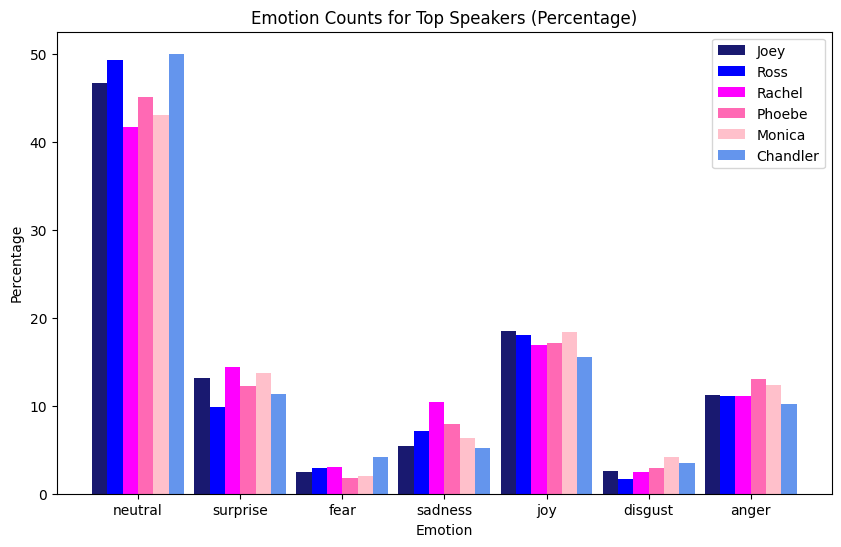

In [17]:
# Get the top N speakers
top_speakers = df_viz.Speaker.value_counts().head(6).index


emotions = df_viz['Emotion'].unique()

# Set the width of each bar
bar_width = 0.15
num_speakers = len(top_speakers)

# Generate x-axis values
x = np.arange(len(emotions))

# Create the grouped bar chart
plt.figure(figsize=(10, 6))

# Define emotions and corresponding colors
emotions = df_viz['Emotion'].unique()
colors = ['midnightblue', 'b', 'magenta', 'hotpink', 'pink', 'cornflowerblue']

for i, (speaker, color) in enumerate(zip(top_speakers, colors)):
    speaker_counts = df_viz[df_viz['Speaker'] == speaker]['Emotion'].value_counts(normalize=True)
    speaker_counts = speaker_counts[emotions] * 100  # Convert to percentages
    plt.bar(x + i * bar_width, speaker_counts, bar_width, label=speaker, color=color)

# Set labels and title
plt.xlabel('Emotion')
plt.ylabel('Percentage')
plt.title('Emotion Counts for Top Speakers (Percentage)')
plt.xticks(x + bar_width * (num_speakers - 1) / 2, emotions)
plt.legend()

# Show the plot
plt.show()

In [18]:
from datetime import datetime, time


def convert_to_seconds(value):
    time_format = "%H:%M:%S,%f"  # Hours:Minutes:Seconds,Microseconds
    datetime_obj = datetime.strptime(value, time_format)
    time_obj = datetime_obj.time()
    total_seconds = time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second + time_obj.microsecond / 1e6
    return total_seconds

# Parse the strings into datetime objects
df_viz['StartTime'] = df_viz['StartTime'].apply(lambda row: convert_to_seconds(row))
df_viz['EndTime'] = df_viz['EndTime'].apply(lambda row: convert_to_seconds(row))

df_viz['duration'] = df_viz['EndTime'] - df_viz['StartTime']


In [19]:
#Check if some data were wrong and returned a negative duration
df_viz[df_viz['duration']<0]

,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime,image_names,Utterance_cleaned,duration
Sr No.,,,,,,,,,,,,,


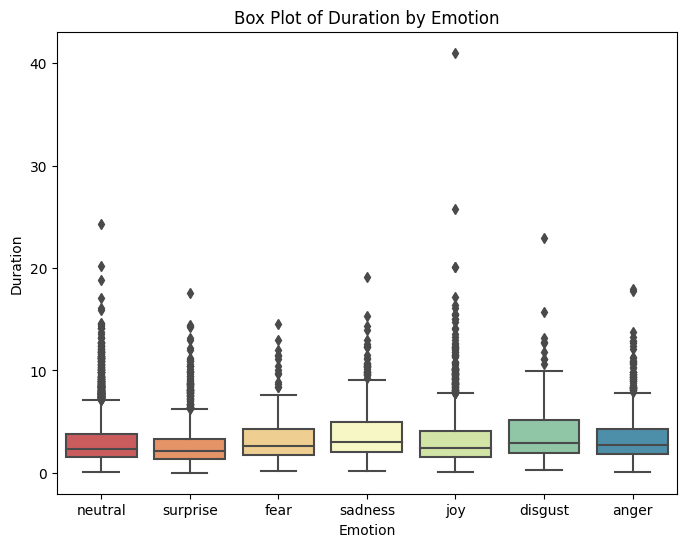

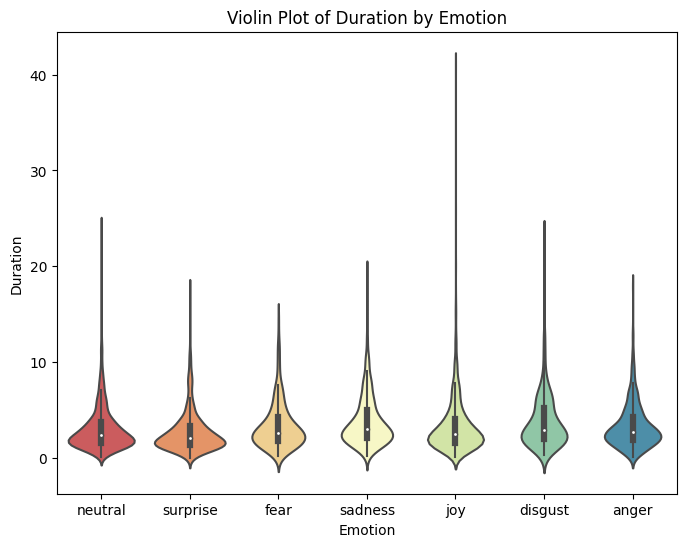

C:\Users\henri\AppData\Local\Temp\ipykernel_6696\2367714649.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Emotion', y='duration', data=df_viz, ci=None, palette='Spectral')


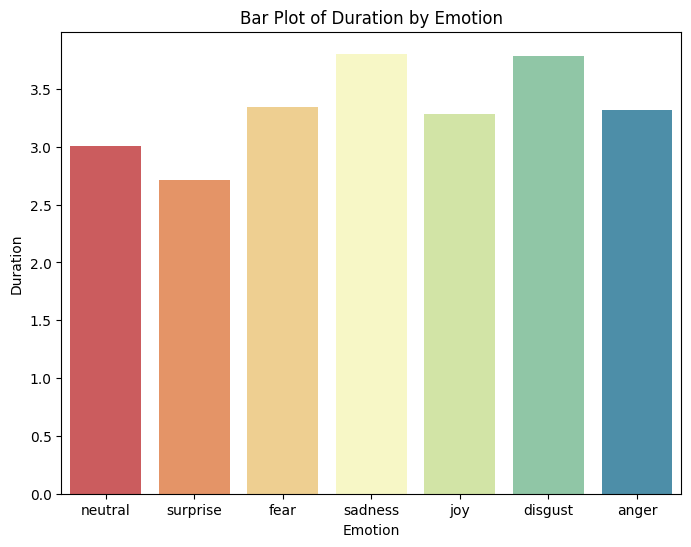

In [20]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Emotion', y='duration', data=df_viz, palette='Spectral')
plt.title('Box Plot of Duration by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Duration')
plt.show()

# Create a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Emotion', y='duration', data=df_viz, palette='Spectral')
plt.title('Violin Plot of Duration by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Duration')
plt.show()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Emotion', y='duration', data=df_viz, ci=None, palette='Spectral')
plt.title('Bar Plot of Duration by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Duration')
plt.show()

In [21]:
from scipy.stats import kruskal

emotions = df_viz['Emotion'].unique()
data = [df_viz[df_viz['Emotion'] == emotion]['duration'] for emotion in emotions]

# Perform Kruskal-Wallis test
h_statistic, p_value = kruskal(*data)

if p_value < 0.05:
    print("Kruskal-Wallis: There is a statistically significant difference between groups.")
    print(f"p-value: {p_value}")
else:
    print("Kruskal-Wallis: There is no statistically significant difference between groups.")
    print(f"p-value: {p_value}")

Kruskal-Wallis: There is a statistically significant difference between groups.
p-value: 9.415061993371665e-38


C:\Users\henri\AppData\Local\Temp\ipykernel_6696\2441877678.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=melted_data, x='Season', y='Percentage', hue='Emotion', ci=None, palette='Spectral')


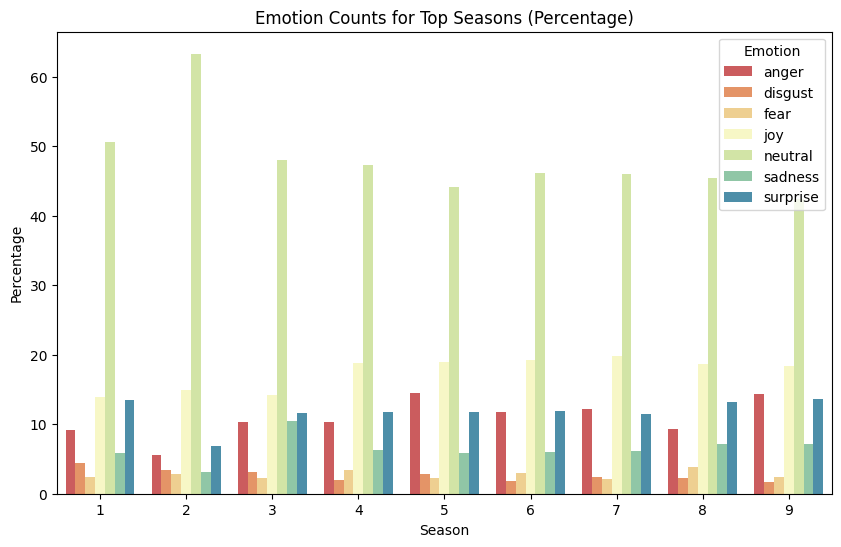

In [22]:

# Sort the DataFrame by the 'Season' column in ascending order
df_viz_sorted = df_viz.sort_values(by='Season')

# Get the top N seasons
top_seasons = df_viz_sorted['Season'].value_counts().index

# Filter the data for the top seasons
filtered_data = df_viz_sorted[df_viz_sorted['Season'].isin(top_seasons)]

# Calculate percentage values for each emotion within each season
percentage_data = filtered_data.groupby(['Season', 'Emotion']).size().unstack(fill_value=0).apply(lambda x: x / x.sum() * 100, axis=1)

# Reshape the data using the 'melt' function
melted_data = percentage_data.reset_index().melt(id_vars='Season', var_name='Emotion', value_name='Percentage')

# Set the width of each bar
bar_width = 0.15

# Specify the order of seasons
season_order = range(1, 9)

# Create the grouped bar chart with Seaborn
plt.figure(figsize=(10, 6))
# sns.set_order(season_order)
ax = sns.barplot(data=melted_data, x='Season', y='Percentage', hue='Emotion', ci=None, palette='Spectral')

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Percentage')
plt.title('Emotion Counts for Top Seasons (Percentage)')

# Show the plot
plt.legend(title='Emotion')
plt.show()

## TF-IDF


In [23]:
df['duration'] = df_viz['duration']
df_tf_idf = df.copy()

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer


def apply_tf_idf(data):

  # Combine the text columns into a single column
  data['text'] = data['Utterance_cleaned']

  # Create an instance of TfidfVectorizer
  tfidf_vectorizer = TfidfVectorizer()

  # Fit and transform the text data
  tfidf_matrix = tfidf_vectorizer.fit_transform(data['text'])

  # Convert the TF-IDF matrix to a DataFrame
  tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=['C_' + feature_name for feature_name in tfidf_vectorizer.get_feature_names_out()])
  # tfidf_df = pd.DataFrame(tfidf_matrix[0].T.todense(), index=tfidf_vectorizer.get_feature_names_out(), columns=["TF-IDF"])

  # Remove the 'text' column from the original DataFrame
  data.drop('text', axis=1, inplace=True)

  # Concatenate the original DataFrame with the TF-IDF DataFrame
  data = pd.concat([data.reset_index(drop=True), tfidf_df], axis=1)
  return data

In [25]:
df_tf_idf = apply_tf_idf(df_tf_idf)

In [26]:
drop_columns = ['StartTime', 'EndTime', 'Episode', 'Dialogue_ID', 'Utterance_ID', 'Utterance', 'Speaker', 'Utterance_cleaned']
df_tf_idf.drop(columns=drop_columns, inplace=True)

#Convert Sentiment to int
dict_sentiment = {'neutral':0, 'positive':1, 'negative':-1}
df_tf_idf['Sentiment'] = df_tf_idf['Sentiment'].map(dict_sentiment)

In [27]:
df_tf_idf

,Emotion,Sentiment,Season,image_names,duration,C_10,C_100,C_1000,C_110,C_112,...,C_zelda,C_zelner,C_zelners,C_zero,C_zillionaire,C_zinfandel,C_zip,C_zone,C_zoo,C_zygomatic
0,neutral,0,8,dia0_utt0,5.672,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,neutral,0,8,dia0_utt1,1.502,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,neutral,0,8,dia0_utt2,2.947,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,neutral,0,8,dia0_utt3,2.752,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,surprise,1,8,dia0_utt4,6.465,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,neutral,0,2,dia1038_utt13,2.626,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9985,neutral,0,2,dia1038_utt14,2.585,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9986,surprise,1,2,dia1038_utt15,3.002,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9987,neutral,0,2,dia1038_utt16,1.876,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
from sklearn.model_selection import train_test_split

target = df_tf_idf['Emotion']

#save image_names to use latter
image_names = df_tf_idf['image_names']

X_train, X_test, y_train, y_test = train_test_split(df_tf_idf.drop(columns=['Emotion', 'image_names']), target, test_size=0.2, random_state=42)

## Models using TF-IDF

In [29]:
from sklearn.neighbors import KNeighborsClassifier

modelknn2 = KNeighborsClassifier(n_neighbors = 15, metric = 'cosine', weights = 'uniform')
modelknn2.fit(X_train, y_train)

KNeighborsClassifier(metric='cosine', n_neighbors=15)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def get_metrics(model, train_df, test_df):
  # Make predictions on the training set
  y_train_pred = model.predict(train_df)

  # Calculate metrics for the training set
  train_accuracy = accuracy_score(y_train, y_train_pred)
  train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
  train_recall = recall_score(y_train, y_train_pred, average='weighted', zero_division=1)
  train_f1 = f1_score(y_train, y_train_pred, average='weighted', zero_division=1)

  # Make predictions on the test set
  y_test_pred = modelknn2.predict(test_df)

  # Calculate metrics for the test set
  test_accuracy = accuracy_score(y_test, y_test_pred)
  test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
  test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=1)
  test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=1)

  # Print the metrics for both sets
  print("Training Set:")
  print("Accuracy:", train_accuracy)
  print("Precision:", train_precision)
  print("Recall:", train_recall)
  print("F1-Score:", train_f1)

  print("Test Set:")
  print("Accuracy:", test_accuracy)
  print("Precision:", test_precision)
  print("Recall:", test_recall)
  print("F1-Score:", test_f1)

  print(classification_report(y_test, y_test_pred))

In [31]:
get_metrics(modelknn2, X_train, X_test)

Training Set:
Accuracy: 0.7559754724064572
Precision: 0.7670335908733369
Recall: 0.7559754724064572
F1-Score: 0.7369430371171269
Test Set:
Accuracy: 0.7312312312312312
Precision: 0.7356511870403429
Recall: 0.7312312312312312
F1-Score: 0.7126292638843839
              precision    recall  f1-score   support

       anger       0.41      0.20      0.27       226
     disgust       0.17      0.02      0.03        55
        fear       0.00      0.00      0.00        44
         joy       0.76      0.86      0.81       332
     neutral       0.98      1.00      0.99       985
     sadness       0.30      0.24      0.27       129
    surprise       0.28      0.49      0.35       227

    accuracy                           0.73      1998
   macro avg       0.41      0.40      0.39      1998
weighted avg       0.71      0.73      0.71      1998



c:\Users\henri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\henri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\henri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
